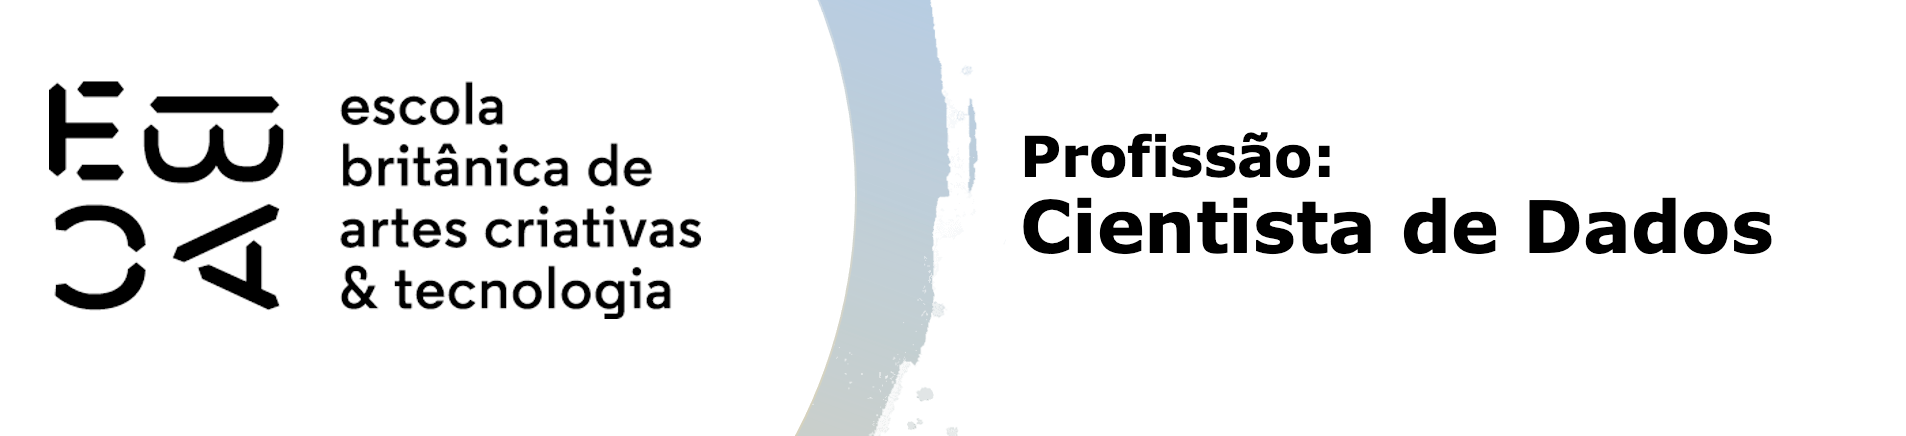

# Tarefa I

Neste projeto, estamos construindo um credit scoring para cartão de crédito, em um desenho amostral com 15 safras, e utilizando 12 meses de performance.

Carregue a base de dados ```credit_scoring.ftr```.

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.formula.api as smf
import statsmodels.api as sm

import warnings
warnings.filterwarnings("ignore")

from sklearn import metrics
from scipy.stats import ks_2samp
from scipy.stats import t
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

In [4]:
df = pd.read_feather('credit_scoring.ftr')
df.head()

,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda,mau
0,2015-01-01,5733,F,N,N,0,Empresário,Médio,Solteiro,Casa,43,6.873973,1.0,2515.39,False
1,2015-01-01,727,F,S,S,0,Assalariado,Médio,Casado,Casa,35,4.526027,2.0,3180.19,False
2,2015-01-01,6374,F,N,N,2,Assalariado,Médio,Casado,Casa,31,0.243836,4.0,1582.29,False
3,2015-01-01,9566,F,N,N,0,Assalariado,Médio,Casado,Casa,54,12.772603,2.0,13721.17,False
4,2015-01-01,9502,F,S,N,0,Assalariado,Superior incompleto,Solteiro,Casa,31,8.432877,1.0,2891.08,False


## Amostragem

Separe os três últimos meses como safras de validação *out of time* (oot).

Variáveis:<br>
Considere que a variável ```data_ref``` não é uma variável explicativa, é somente uma variável indicadora da safra, e não deve ser utilizada na modelagem. A variávei ```index``` é um identificador do cliente, e também não deve ser utilizada como covariável (variável explicativa). As restantes podem ser utilizadas para prever a inadimplência, incluindo a renda.


In [6]:
#Data minima
df.data_ref.min()

Timestamp('2015-01-01 00:00:00')

In [7]:
#Data maxima
df.data_ref.max()

Timestamp('2016-03-01 00:00:00')

In [8]:
# Retornando os ultimos 3 meses
meses = 3
data = pd.Series(pd.date_range('1/1/2016', periods = meses, freq = 'MS'))
date = pd.DataFrame(data)
date = date.rename({0:'oot'}, axis = 'columns')
date

,oot
0,2016-01-01
1,2016-02-01
2,2016-03-01


## Descritiva básica univariada

- Descreva a base quanto ao número de linhas, número de linhas para cada mês em ```data_ref```.
- Faça uma descritiva básica univariada de cada variável. Considere as naturezas diferentes: qualitativas e quantitativas.

In [10]:
print('número de linhas: {0}'.format(df.shape[0]))
date.value_counts()
df.data_ref.value_counts()

número de linhas: 750000


data_ref
2015-01-01    50000
2015-02-01    50000
2015-03-01    50000
2015-04-01    50000
2015-05-01    50000
2015-06-01    50000
2015-07-01    50000
2015-08-01    50000
2015-09-01    50000
2015-10-01    50000
2015-11-01    50000
2015-12-01    50000
2016-01-01    50000
2016-02-01    50000
2016-03-01    50000
Name: count, dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   data_ref               750000 non-null  datetime64[ns]
 1   index                  750000 non-null  int64         
 2   sexo                   750000 non-null  object        
 3   posse_de_veiculo       750000 non-null  object        
 4   posse_de_imovel        750000 non-null  object        
 5   qtd_filhos             750000 non-null  int64         
 6   tipo_renda             750000 non-null  object        
 7   educacao               750000 non-null  object        
 8   estado_civil           750000 non-null  object        
 9   tipo_residencia        750000 non-null  object        
 10  idade                  750000 non-null  int64         
 11  tempo_emprego          624043 non-null  float64       
 12  qt_pessoas_residencia  750000 non-null  floa

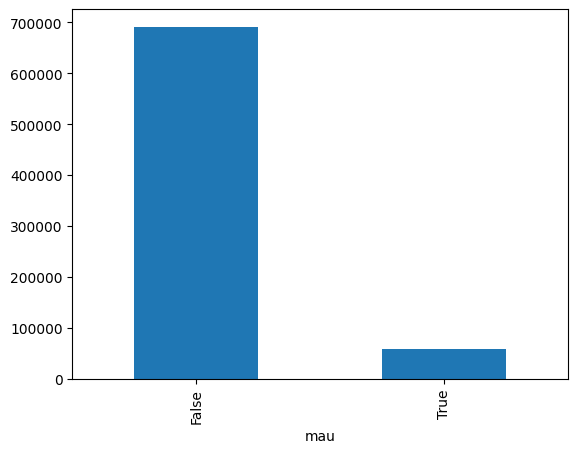

In [12]:
var = 'mau'
grafico_barras = df[var].value_counts().plot.bar()

<Figure size 640x480 with 0 Axes>

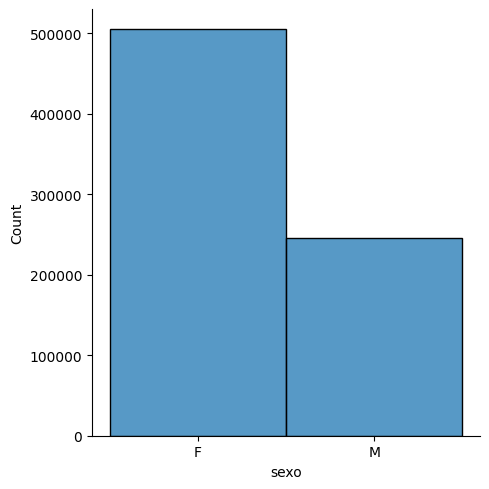

In [13]:
df.sexo.value_counts()
plt.clf()
var = "sexo"
sns.displot(df, x = var, bins = 50)
plt.show()

<Figure size 640x480 with 0 Axes>

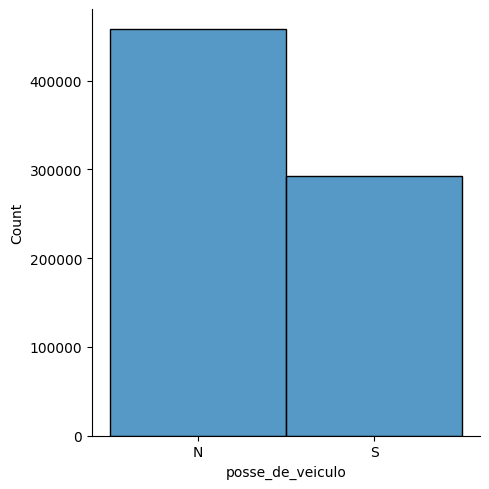

In [14]:
df.posse_de_veiculo.value_counts()
plt.clf()
var = "posse_de_veiculo"
sns.displot(df, x = var, bins = 50)
plt.show()

<Figure size 640x480 with 0 Axes>

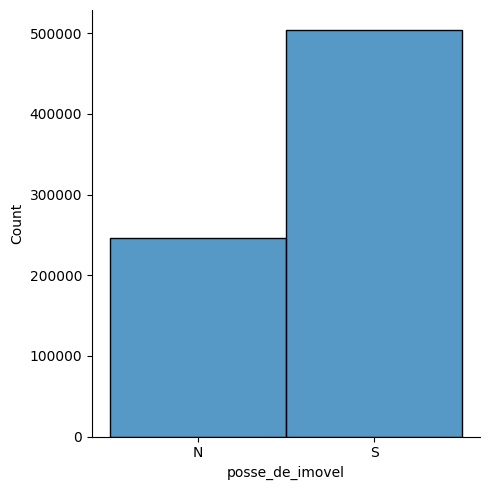

In [15]:
df.posse_de_imovel.value_counts()
plt.clf()
var = "posse_de_imovel"
sns.displot(df, x = var, bins = 50)
plt.show()

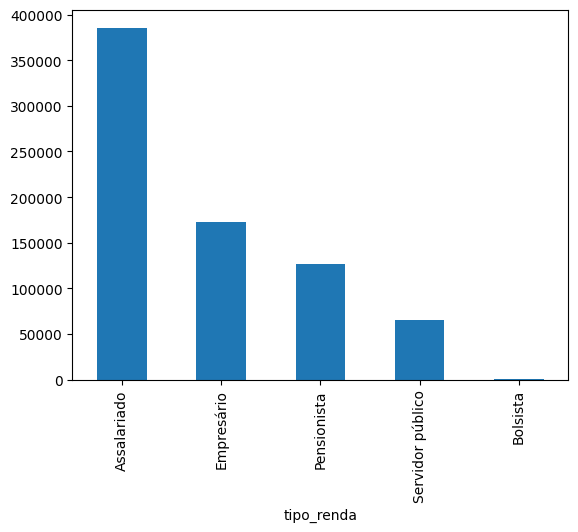

In [16]:
var = 'tipo_renda'
grafico_barras = df[var].value_counts().plot.bar()

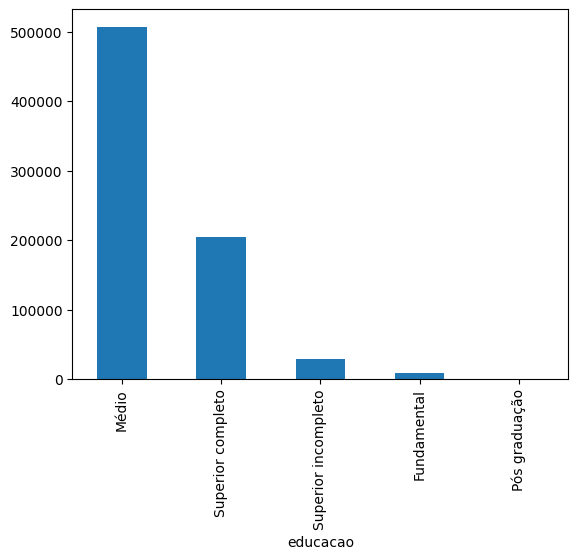

In [17]:
var = 'educacao'
grafico_barras = df[var].value_counts().plot.bar()

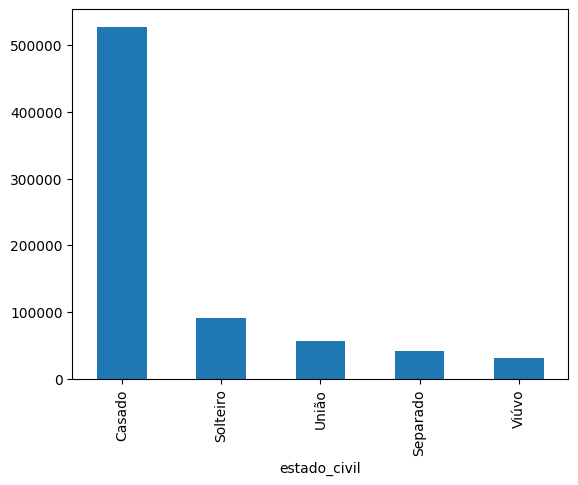

In [18]:
var = 'estado_civil'
grafico_barras = df[var].value_counts().plot.bar()

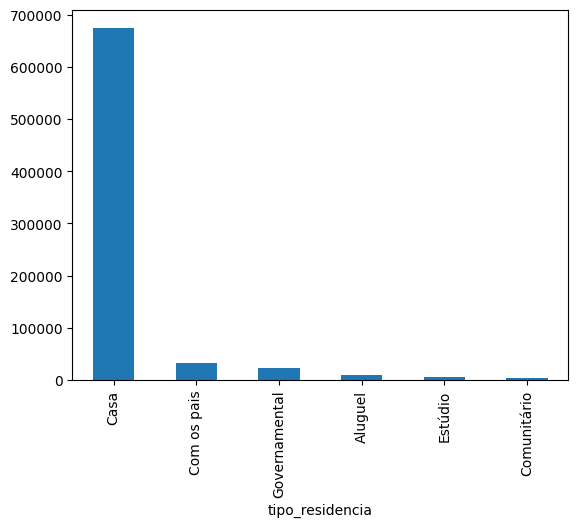

In [19]:
var = 'tipo_residencia'
grafico_barras = df[var].value_counts().plot.bar()

<Figure size 640x480 with 0 Axes>

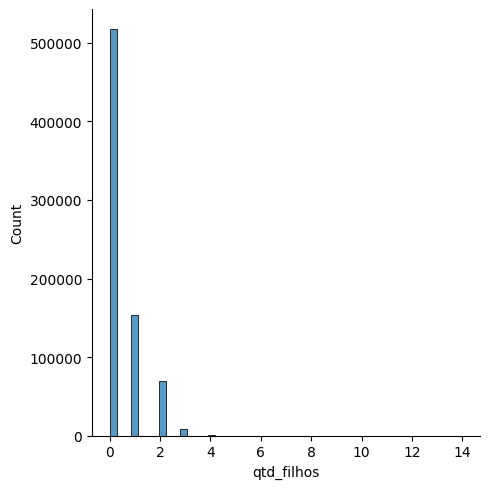

In [20]:
plt.clf()
var = "qtd_filhos"
sns.displot(df, x = var, bins = 50)
plt.show()

<Figure size 640x480 with 0 Axes>

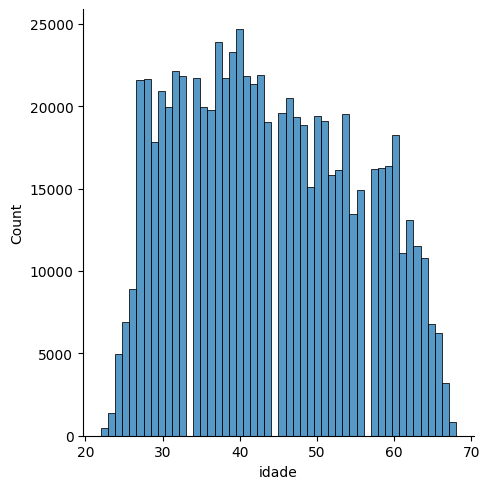

In [21]:
plt.clf()
var = "idade"
sns.displot(df, x = var, bins = 50)
plt.show()

<Figure size 640x480 with 0 Axes>

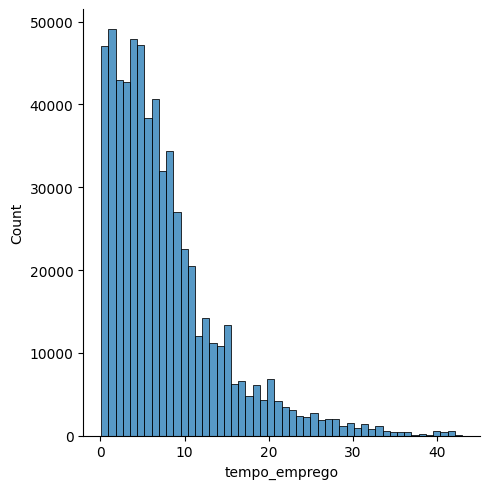

In [22]:
plt.clf()
var = "tempo_emprego"
sns.displot(df, x = var, bins = 50)
plt.show()

<Figure size 640x480 with 0 Axes>

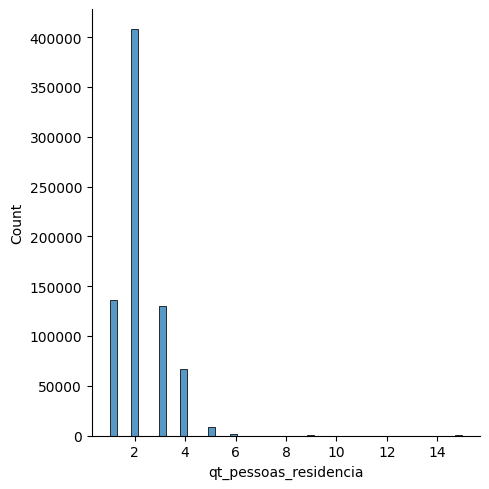

In [23]:
plt.clf()
var = "qt_pessoas_residencia"
sns.displot(df, x = var, bins = 50)
plt.show()

<Figure size 640x480 with 0 Axes>

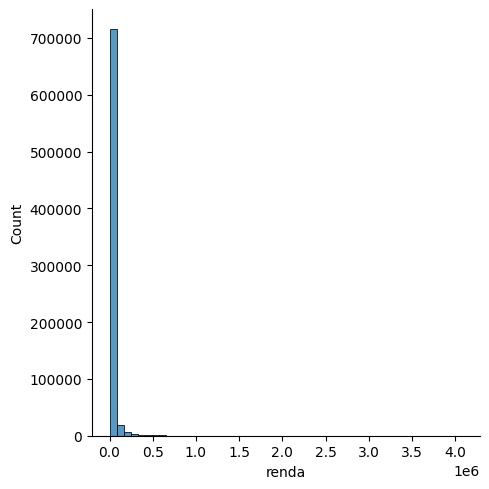

In [24]:
plt.clf()
var = "renda"
sns.displot(df, x = var, bins = 50)
plt.show()

## Descritiva bivariada

Faça uma análise descritiva bivariada de cada variável

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   data_ref               750000 non-null  datetime64[ns]
 1   index                  750000 non-null  int64         
 2   sexo                   750000 non-null  object        
 3   posse_de_veiculo       750000 non-null  object        
 4   posse_de_imovel        750000 non-null  object        
 5   qtd_filhos             750000 non-null  int64         
 6   tipo_renda             750000 non-null  object        
 7   educacao               750000 non-null  object        
 8   estado_civil           750000 non-null  object        
 9   tipo_residencia        750000 non-null  object        
 10  idade                  750000 non-null  int64         
 11  tempo_emprego          624043 non-null  float64       
 12  qt_pessoas_residencia  750000 non-null  floa

<Axes: xlabel='sexo', ylabel='mau'>

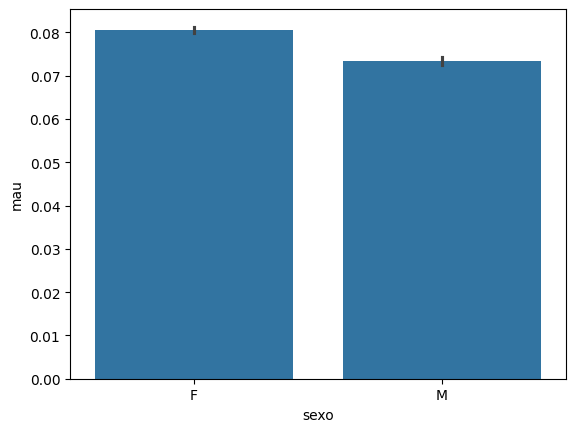

In [27]:
sns.barplot(x='sexo', y = 'mau', data=df)

<Axes: xlabel='posse_de_veiculo', ylabel='mau'>

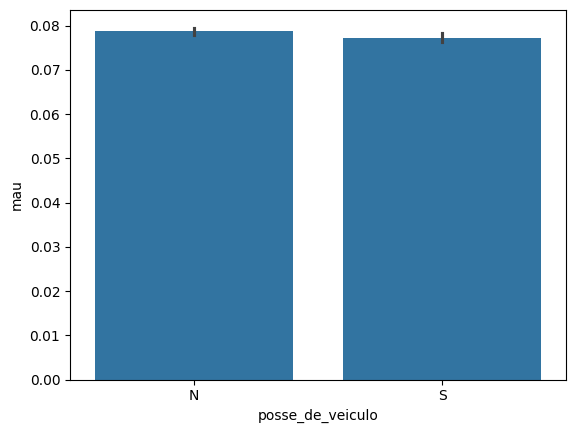

In [28]:
sns.barplot(x='posse_de_veiculo', y = 'mau', data=df)

<Axes: xlabel='posse_de_imovel', ylabel='mau'>

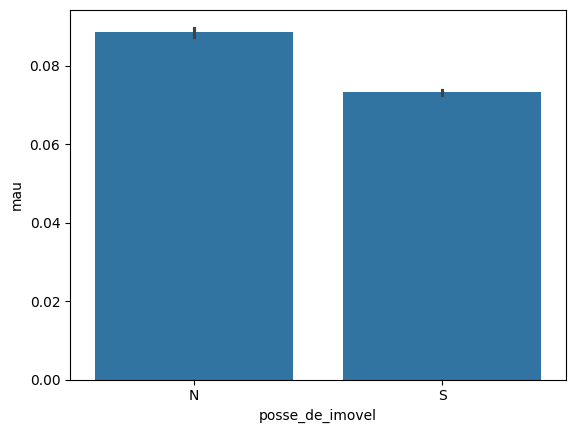

In [29]:
sns.barplot(x='posse_de_imovel', y = 'mau', data=df)

<Axes: xlabel='tipo_renda', ylabel='mau'>

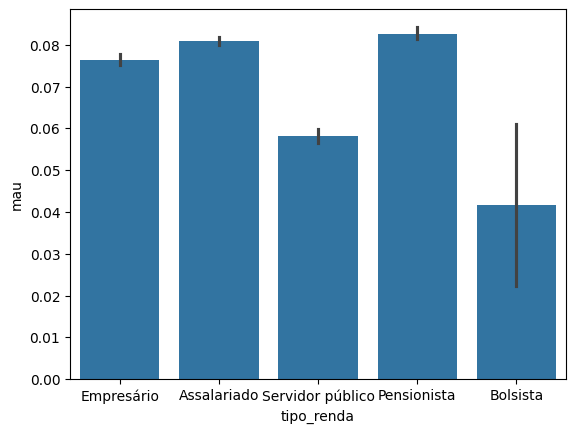

In [30]:
sns.barplot(x='tipo_renda', y = 'mau', data=df)

[Text(0, 0, 'Médio'),
 Text(1, 0, 'Superior incompleto'),
 Text(2, 0, 'Superior completo'),
 Text(3, 0, 'Fundamental'),
 Text(4, 0, 'Pós graduação')]

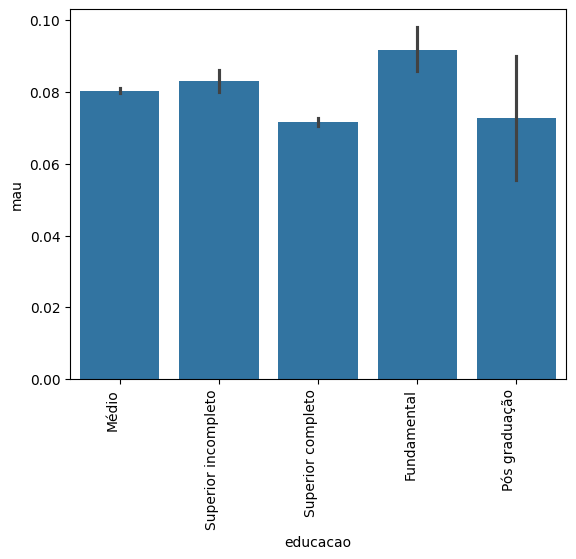

In [31]:
educacao = sns.barplot(x='educacao', y = 'mau', data=df)
educacao.set_xticklabels(educacao.get_xticklabels(), rotation=90, horizontalalignment='right')

<Axes: xlabel='estado_civil', ylabel='mau'>

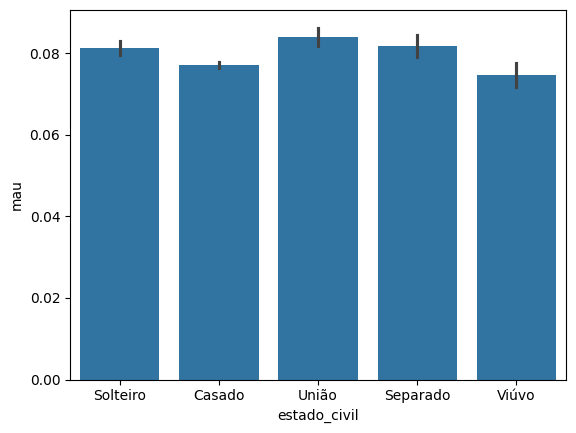

In [32]:
sns.barplot(x='estado_civil', y = 'mau', data=df)

[Text(0, 0, 'Casa'),
 Text(1, 0, 'Com os pais'),
 Text(2, 0, 'Aluguel'),
 Text(3, 0, 'Comunitário'),
 Text(4, 0, 'Governamental'),
 Text(5, 0, 'Estúdio')]

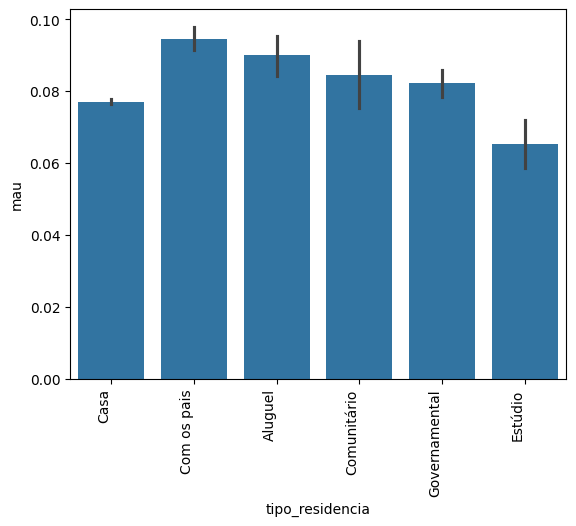

In [33]:
tipo_residencia = sns.barplot(x='tipo_residencia', y = 'mau', data=df)    
tipo_residencia.set_xticklabels(tipo_residencia.get_xticklabels(), rotation=90, horizontalalignment='right')

## Desenvolvimento do modelo

Desenvolva um modelo de *credit scoring* através de uma regressão logística.

- Trate valores missings e outliers
- Trate 'zeros estruturais'
- Faça agrupamentos de categorias conforme vimos em aula
- Proponha uma equação preditiva para 'mau'
- Caso hajam categorias não significantes, justifique

In [35]:
df.isna().sum()

data_ref                      0
index                         0
sexo                          0
posse_de_veiculo              0
posse_de_imovel               0
qtd_filhos                    0
tipo_renda                    0
educacao                      0
estado_civil                  0
tipo_residencia               0
idade                         0
tempo_emprego            125957
qt_pessoas_residencia         0
renda                         0
mau                           0
dtype: int64

In [36]:
df['tempo_emprego'].fillna(df['tempo_emprego'].mean())

0          6.873973
1          4.526027
2          0.243836
3         12.772603
4          8.432877
            ...    
749995     3.038356
749996     7.748574
749997    10.375342
749998    13.780822
749999    10.375342
Name: tempo_emprego, Length: 750000, dtype: float64

In [37]:
metadados = pd.DataFrame(df.dtypes, columns=['dtype'])
metadados['valores_unicos'] = df.nunique()

metadados

,dtype,valores_unicos
data_ref,datetime64[ns],15
index,int64,16650
sexo,object,2
posse_de_veiculo,object,2
posse_de_imovel,object,2
qtd_filhos,int64,8
tipo_renda,object,5
educacao,object,5
estado_civil,object,5
tipo_residencia,object,6


In [38]:
df['mau'] = df.mau.astype('int64')

In [39]:
def IV(variavel, resposta):
    tab = pd.crosstab(variavel, resposta, margins=True, margins_name='total')

    rótulo_evento = tab.columns[0]
    rótulo_nao_evento = tab.columns[1]

    tab['pct_evento'] = tab[rótulo_evento]/tab.loc['total',rótulo_evento]
    tab['ep'] = tab[rótulo_evento]/tab.loc['total',rótulo_evento]
    
    tab['pct_nao_evento'] = tab[rótulo_nao_evento]/tab.loc['total',rótulo_nao_evento]
    tab['woe'] = np.log(tab.pct_evento/tab.pct_nao_evento)
    tab['iv_parcial'] = (tab.pct_evento - tab.pct_nao_evento)*tab.woe
    return tab['iv_parcial'].sum()

In [40]:
iv_sexo = IV(df.sexo, df.mau)
print(f'IV da variável SEXO: {iv_sexo:.1%}')

IV da variável SEXO: 0.2%


In [41]:
metadados = pd.DataFrame(df.dtypes, columns=['dtype'])
metadados['valores_unicos'] = df.nunique()
metadados['variavel'] = 'covariavel'
metadados.loc['mau','variavel'] = 'resposta'
metadados.loc['bom','variavel'] = 'resposta'
metadados

,dtype,valores_unicos,variavel
data_ref,datetime64[ns],15.0,covariavel
index,int64,16650.0,covariavel
sexo,object,2.0,covariavel
posse_de_veiculo,object,2.0,covariavel
posse_de_imovel,object,2.0,covariavel
qtd_filhos,int64,8.0,covariavel
tipo_renda,object,5.0,covariavel
educacao,object,5.0,covariavel
estado_civil,object,5.0,covariavel
tipo_residencia,object,6.0,covariavel


In [42]:
var='idade'
IV(pd.qcut(df[var],5,duplicates='drop'), df.mau)

0.01796842289500074

In [43]:
for var in metadados[metadados.variavel=='covariavel'].index:
    if (metadados.loc[var, 'valores_unicos']>6):
        metadados.loc[var, 'IV'] = IV(pd.qcut(df[var],5,duplicates='drop'), df.mau)
    else:
        metadados.loc[var, 'IV'] = IV(df[var], df.mau)
        
        
metadados

,dtype,valores_unicos,variavel,IV
data_ref,datetime64[ns],15.0,covariavel,0.345982
index,int64,16650.0,covariavel,0.002664
sexo,object,2.0,covariavel,0.002185
posse_de_veiculo,object,2.0,covariavel,0.000108
posse_de_imovel,object,2.0,covariavel,0.009693
qtd_filhos,int64,8.0,covariavel,0.000030
tipo_renda,object,5.0,covariavel,0.009360
educacao,object,5.0,covariavel,0.003547
estado_civil,object,5.0,covariavel,0.001126
tipo_residencia,object,6.0,covariavel,0.003045


In [44]:
def biv_discreta(var, df):
    df['bom'] = 1-df.mau
    g = df.groupby(var)
    
    biv = pd.DataFrame({'qt_bom': g['bom'].sum(),
                       'qt_mau': g['bom'].sum(),
                       'mau':g['bom'].mean(),
                       var: g['bom'].mean().index,
                       'cont':g[var].count()})
    biv['ep'] = (biv.mau*(1-biv.mau)/biv.cont)**.5
    biv['mau_sup'] = biv.mau+t.ppf([0.975], biv.cont-1)*biv.ep
    biv['mau_inf'] = biv.mau+t.ppf([0.025], biv.cont-1)*biv.ep
    
    biv['logit'] = np.log(biv.mau/(1-biv.mau))
    biv['logit_sup'] = np.log(biv.mau_sup/(1-biv.mau_sup))
    biv['logit_inf'] = np.log(biv.mau_sup/(1-biv.mau_inf))
    
    tx_mau_geral = df.mau.mean()
    woe_geral = np.log(df.mau.mean() / (1 - df.mau.mean()))
    
    biv['woe'] = biv.logit - woe_geral
    biv['woe_sup'] = biv.logit_sup - woe_geral
    biv['woe_inf'] = biv.logit_inf - woe_geral
    
    fig, ax = plt.subplots(2,1, figsize=(8,6))
    ax[0].plot(biv[var], biv.woe,  ':bo', label='woe')
    ax[0].plot(biv[var], biv.woe_sup, 'o:r', label='limite superior')
    ax[0].plot(biv[var], biv.woe_inf, 'o:r', label='limite superior')
        
    num_cat = biv.shape[0]
    ax[0].set_xlim([-.3, num_cat-.7])
    
    ax[0].set_ylabel("Weight of Evidence")
    ax[0].legend(bbox_to_anchor=(.83, 1.17), ncol=3)
    
    ax[0].set_xticks(list(range(num_cat)))
    ax[0].set_xticklabels(biv[var], rotation=15)
    
    ax[1] = biv.cont.plot.bar()
    return biv

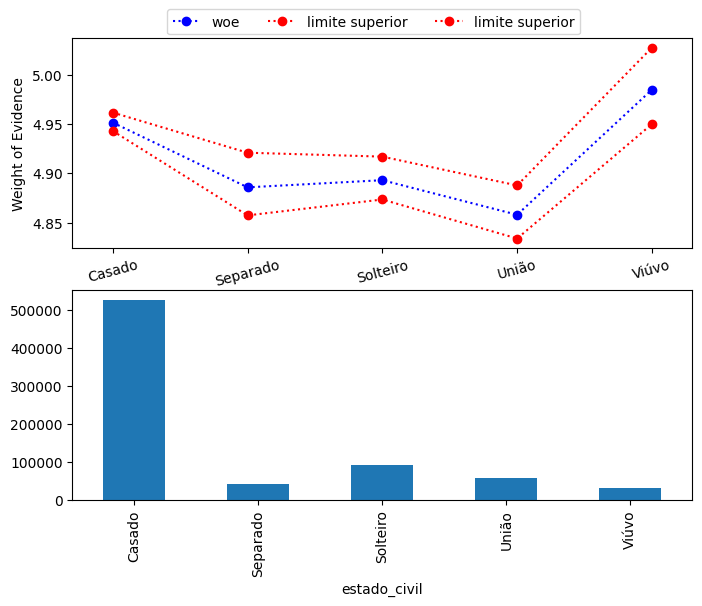

In [45]:
biv_discreta('estado_civil', df);

,qt_bom,qt_mau,mau,tipo_renda,cont,ep,mau_sup,mau_inf,logit,logit_sup,logit_inf,woe,woe_sup,woe_inf
tipo_renda,,,,,,,,,,,,,,
Assalariado,354527,354527,0.919083,Assalariado,385740,0.000439,0.919943,0.918222,2.429950,2.441578,2.420306,4.897138,4.908766,4.887495
Bols./SerPubl,61497,61497,0.942006,Bols./SerPubl,65283,0.000915,0.943799,0.940213,2.787678,2.820985,2.759132,5.254866,5.288173,5.226320
Empresário,159508,159508,0.923549,Empresário,172712,0.000639,0.924802,0.922296,2.491574,2.509458,2.476671,4.958762,4.976646,4.943859
Pensionista,115825,115825,0.917317,Pensionista,126265,0.000775,0.918836,0.915798,2.406436,2.426634,2.389885,4.873624,4.893822,4.857073


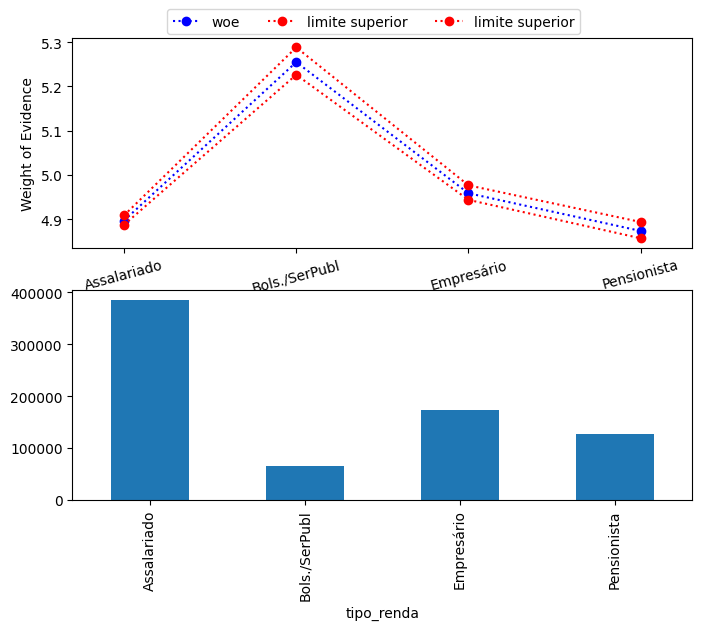

In [46]:
df2 = df.copy()
df2.tipo_renda.replace({'Bolsista': 'Bols./SerPubl', 'Servidor público': 'Bols./SerPubl'}, inplace=True)
biv_discreta('tipo_renda', df2)

In [47]:
IV(df2.tipo_renda, df.mau)

0.009314630323182816

,qt_bom,qt_mau,mau,educacao,cont,ep,mau_sup,mau_inf,logit,logit_sup,logit_inf,woe,woe_sup,woe_inf
educacao,,,,,,,,,,,,,,
Fundamental,7789,7789,0.908338,Fundamental,8575,0.003116,0.914446,0.902230,2.293511,2.369175,2.235701,4.760699,4.836363,4.702889
Médio,466106,466106,0.919639,Médio,506836,0.000382,0.920387,0.918890,2.437448,2.447619,2.428992,4.904636,4.914807,4.896180
Sup.Compl/PosGra,190437,190437,0.928427,Sup.Compl/PosGra,205118,0.000569,0.929542,0.927311,2.562767,2.579677,2.548502,5.029955,5.046865,5.015690
Superior incompleto,27025,27025,0.917003,Superior incompleto,29471,0.001607,0.920153,0.913853,2.402308,2.444427,2.368489,4.869496,4.911615,4.835677


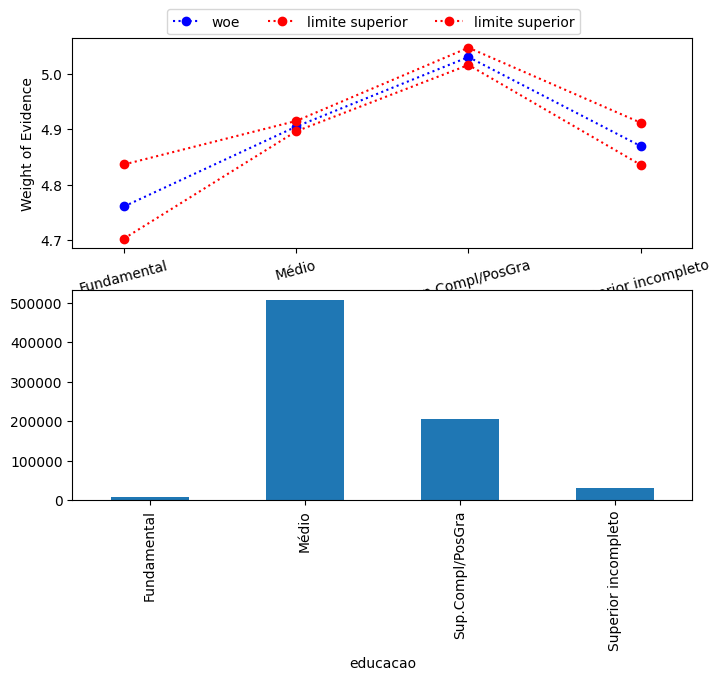

In [48]:
df2.educacao.replace({'Superior completo': 'Sup.Compl/PosGra', 'Pós graduação': 'Sup.Compl/PosGra'}, inplace=True)
biv_discreta('educacao', df2)

0.0023941390471014087

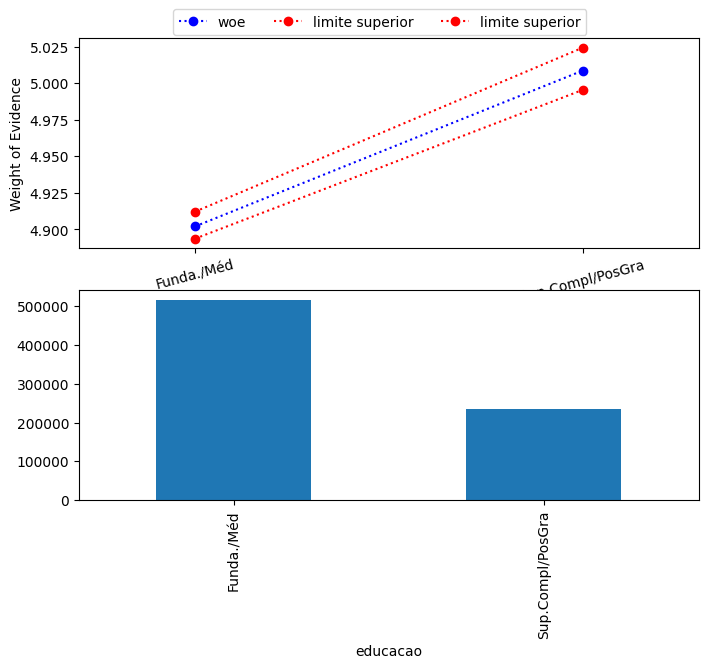

In [49]:
df2.educacao.replace({'Superior incompleto':'Sup.Compl/PosGra', 
                      'Fundamental':'Funda./Méd',
                      'Médio': 'Funda./Méd'
                     }, inplace=True)
biv_discreta('educacao', df2)
IV(df2.educacao, df.mau)

## Avaliação do modelo

Avalie o poder discriminante do modelo pelo menos avaliando acurácia, KS e Gini.

Avalie estas métricas nas bases de desenvolvimento e *out of time*.

In [51]:
pd.crosstab(df['mau'], date['oot'])

oot,2016-01-01,2016-02-01,2016-03-01
mau,,,
0,1,1,1


# a - Criar um pipeline utilizando o sklearn pipeline para o preprocessamento 

## Pré processamento

### Substituição de nulos (nans)

Existe nulos na base? é dado numérico ou categórico? qual o valor de substituição? média? valor mais frequente? etc

In [82]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
X_digits, y_digits = load_digits(return_X_y=True, as_frame=True)
X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits, test_size=0.3, random_state=10)

pca = PCA(n_components=20)

scaler = StandardScaler()

logistic = LogisticRegression(max_iter=200)

In [66]:
import sklearn
print(sklearn.__version__)

1.4.2


In [68]:
X_digits.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [70]:
X_digits.shape

(1797, 64)

In [88]:
import pandas as pd

# Verificar se há valores nulos
nulos = X_digits.isnull().sum()
print(nulos)

pixel_0_0    0
pixel_0_1    0
pixel_0_2    0
pixel_0_3    0
pixel_0_4    0
            ..
pixel_7_3    0
pixel_7_4    0
pixel_7_5    0
pixel_7_6    0
pixel_7_7    0
Length: 64, dtype: int64


In [90]:
# Substituir nulos por média nas colunas numéricas
X_digits.fillna(X_digits.mean(), inplace=True)


### Remoção de outliers

Como identificar outlier? Substituir o outlier por algum valor? Remover a linha?

In [92]:
# Calcular IQR
Q1 = X_digits.quantile(0.25)
Q3 = X_digits.quantile(0.75)
IQR = Q3 - Q1

# Identificar outliers
outliers = ((X_digits < (Q1 - 1.5 * IQR)) | (X_digits > (Q3 + 1.5 * IQR)))
print(outliers.sum())

pixel_0_0      0
pixel_0_1    266
pixel_0_2      0
pixel_0_3    112
pixel_0_4    100
            ... 
pixel_7_3    144
pixel_7_4    114
pixel_7_5      0
pixel_7_6    267
pixel_7_7    110
Length: 64, dtype: int64


In [94]:
# Remover outliers
X_digits_clean = X_digits[~outliers.any(axis=1)]

### Seleção de variáveis

Qual tipo de técnica? Boruta? Feature importance? 

In [110]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Carregar o dataframe (substitua com o seu dataframe real)
pd.read_feather('credit_scoring.ftr')

# Verificar se há valores nulos
print(df.isnull().sum())

# Substituir valores nulos com a média para variáveis numéricas e valor mais frequente para categóricas
df['idade'].fillna(df['idade'].mean(), inplace=True)
df['tempo_emprego'].fillna(df['tempo_emprego'].mean(), inplace=True)
df['qt_pessoas_residencia'].fillna(df['qt_pessoas_residencia'].mode()[0], inplace=True)

# Codificar variáveis categóricas com LabelEncoder
categorical_columns = ['sexo', 'posse_de_veiculo', 'posse_de_imovel', 'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia']
le = LabelEncoder()

for col in categorical_columns:
    df[col] = le.fit_transform(df[col])

# Separar variáveis independentes e dependentes
X = df.drop(columns=['data_ref', 'index', 'renda', 'mau'])
y = df['mau']


data_ref                      0
index                         0
sexo                          0
posse_de_veiculo              0
posse_de_imovel               0
qtd_filhos                    0
tipo_renda                    0
educacao                      0
estado_civil                  0
tipo_residencia               0
idade                         0
tempo_emprego            125957
qt_pessoas_residencia         0
renda                         0
mau                           0
bom                           0
dtype: int64


In [112]:
from boruta import BorutaPy
from sklearn.ensemble import RandomForestClassifier

# Definir modelo random forest
rf = RandomForestClassifier(n_jobs=-1, max_depth=5)

# Aplicar Boruta
boruta = BorutaPy(rf, n_estimators='auto', random_state=42)
boruta.fit(X.values, y)

# Obter as variáveis selecionadas
selected_features = X.columns[boruta.support_]
print("Variáveis selecionadas pelo Boruta:", selected_features)


Variáveis selecionadas pelo Boruta: Index(['sexo', 'posse_de_imovel', 'qtd_filhos', 'tipo_renda', 'educacao',
       'tipo_residencia', 'idade', 'tempo_emprego', 'qt_pessoas_residencia',
       'bom'],
      dtype='object')


### Redução de dimensionalidade (PCA)

Aplicar PCA para reduzir a dimensionalidade para 5

In [114]:

# Codificar variáveis categóricas
categorical_columns = ['sexo', 'posse_de_veiculo', 'posse_de_imovel', 'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia']
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in categorical_columns:
    df[col] = le.fit_transform(df[col])

# Separar variáveis independentes
X = df.drop(columns=['data_ref', 'index', 'renda', 'mau'])

# Normalizar os dados (importantíssimo para PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar PCA para reduzir a dimensionalidade para 5 componentes
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X_scaled)

# Verificar a explicação da variância
print("Explicação da variância por componente:")
print(pca.explained_variance_ratio_)

# Visualizar os dados transformados (5 componentes principais)
X_pca_df = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(5)])

# Exibir as primeiras linhas
print(X_pca_df.head())

Explicação da variância por componente:
[0.21285028 0.11322005 0.09885821 0.0947238  0.08796241]
        PC1       PC2       PC3       PC4       PC5
0 -1.723880 -0.599522  1.191571  0.247784 -0.072064
1  0.345522 -0.596478 -0.736803 -0.359491  0.501065
2  2.744917  1.111131  1.870782 -0.098849  0.612246
3 -0.929961  0.435219  0.462954  1.241505  0.505814
4 -0.134150 -2.278237  0.793970 -0.163992 -2.426948


### Criação de dummies

Aplicar o get_dummies() ou onehotencoder() para transformar colunas catégoricas do dataframe em colunas de 0 e 1. 
- sexo
- posse_de_veiculo
- posse_de_imovel
- tipo_renda
- educacao
- estado_civil
- tipo_residencia

In [72]:
dummy = pd.get_dummies(df, columns=['sexo', 'posse_de_veiculo', 'posse_de_imovel', 'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia'])

In [74]:
dummy

,data_ref,index,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda,mau,bom,sexo_F,...,estado_civil_Separado,estado_civil_Solteiro,estado_civil_União,estado_civil_Viúvo,tipo_residencia_Aluguel,tipo_residencia_Casa,tipo_residencia_Com os pais,tipo_residencia_Comunitário,tipo_residencia_Estúdio,tipo_residencia_Governamental
0,2015-01-01,5733,0,43,6.873973,1.0,2515.39,0,1,True,...,False,True,False,False,False,True,False,False,False,False
1,2015-01-01,727,0,35,4.526027,2.0,3180.19,0,1,True,...,False,False,False,False,False,True,False,False,False,False
2,2015-01-01,6374,2,31,0.243836,4.0,1582.29,0,1,True,...,False,False,False,False,False,True,False,False,False,False
3,2015-01-01,9566,0,54,12.772603,2.0,13721.17,0,1,True,...,False,False,False,False,False,True,False,False,False,False
4,2015-01-01,9502,0,31,8.432877,1.0,2891.08,0,1,True,...,False,True,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
749995,2016-03-01,13689,0,48,3.038356,2.0,2109.99,0,1,False,...,False,False,False,False,False,True,False,False,False,False
749996,2016-03-01,7000,0,65,NaN,1.0,1389.39,0,1,True,...,False,True,False,False,False,True,False,False,False,False
749997,2016-03-01,14023,2,43,10.375342,4.0,649.06,1,0,False,...,False,False,False,False,False,True,False,False,False,False
749998,2016-03-01,2396,0,56,13.780822,1.0,4216.72,1,0,True,...,False,False,False,True,False,True,False,False,False,False


In [76]:
dummy.dtypes

data_ref                         datetime64[ns]
index                                     int64
qtd_filhos                                int64
idade                                     int64
tempo_emprego                           float64
qt_pessoas_residencia                   float64
renda                                   float64
mau                                       int64
bom                                       int64
sexo_F                                     bool
sexo_M                                     bool
posse_de_veiculo_N                         bool
posse_de_veiculo_S                         bool
posse_de_imovel_N                          bool
posse_de_imovel_S                          bool
tipo_renda_Assalariado                     bool
tipo_renda_Bolsista                        bool
tipo_renda_Empresário                      bool
tipo_renda_Pensionista                     bool
tipo_renda_Servidor público                bool
educacao_Fundamental                    

### Pipeline 

Crie um pipeline contendo essas funções.

preprocessamento()
- substituicao de nulos
- remoção outliers
- PCA
- Criação de dummy de pelo menos 1 variável (posse_de_veiculo)

In [78]:

X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits, test_size=0.3, random_state=10)

# Define a PCA to Linear dimensionality reduction
pca_pipe = PCA(n_components=15)

# Define a Standard Scaler to normalize inputs
scaler_pipe = StandardScaler()

# set the tolerance to a large value to make the example faster
logistic_pipe = LogisticRegression(max_iter=200)

In [84]:
pipe = Pipeline(steps=[("scaler", scaler_pipe), 
                       ("pca", pca_pipe), 
                       ("logistic", logistic_pipe)])

In [86]:
pipe.named_steps

{'scaler': StandardScaler(),
 'pca': PCA(n_components=15),
 'logistic': LogisticRegression(max_iter=200)}

# b - Pycaret na base de dados 

Utilize o pycaret para pre processar os dados e rodar o modelo **lightgbm**. Faça todos os passos a passos da aula e gere os gráficos finais. E o pipeline de toda a transformação.



In [116]:
import pandas as pd

df = pd.read_feather('credit_scoring.ftr')
df.head()

,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda,mau
0,2015-01-01,5733,F,N,N,0,Empresário,Médio,Solteiro,Casa,43,6.873973,1.0,2515.39,False
1,2015-01-01,727,F,S,S,0,Assalariado,Médio,Casado,Casa,35,4.526027,2.0,3180.19,False
2,2015-01-01,6374,F,N,N,2,Assalariado,Médio,Casado,Casa,31,0.243836,4.0,1582.29,False
3,2015-01-01,9566,F,N,N,0,Assalariado,Médio,Casado,Casa,54,12.772603,2.0,13721.17,False
4,2015-01-01,9502,F,S,N,0,Assalariado,Superior incompleto,Solteiro,Casa,31,8.432877,1.0,2891.08,False


In [118]:
from pycaret.classification import *
models()

RuntimeError: ('Pycaret only supports python 3.9, 3.10, 3.11. Your actual Python version: ', sys.version_info(major=3, minor=12, micro=4, releaselevel='final', serial=0), 'Please DOWNGRADE your Python version.')

In [121]:
xxx = create_model('xxx')

NameError: name 'create_model' is not defined

In [123]:
dataset = df.sample(50000)

In [125]:
df.columns

Index(['data_ref', 'index', 'sexo', 'posse_de_veiculo', 'posse_de_imovel',
       'qtd_filhos', 'tipo_renda', 'educacao', 'estado_civil',
       'tipo_residencia', 'idade', 'tempo_emprego', 'qt_pessoas_residencia',
       'renda', 'mau'],
      dtype='object')

In [127]:
dataset = df.sample(40000)

In [129]:
dataset.drop(['data_ref','index'], axis=1, inplace=True)

In [131]:
data = dataset.sample(frac=0.95, random_state=786)
data_unseen = dataset.drop(data.index)
data.reset_index(inplace=True, drop=True)
data_unseen.reset_index(inplace=True, drop=True)
print('Conjunto de dados para modelagem (treino e teste): ' + str(data.shape))
print('Conjunto de dados não usados no treino/teste, apenas como validação: ' + str(data_unseen.shape))

Conjunto de dados para modelagem (treino e teste): (38000, 13)
Conjunto de dados não usados no treino/teste, apenas como validação: (2000, 13)
